In [2]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
yr=365*24*3600
m_p=1.6726219e-24
AU=1.496e13

h=0.6774

In [5]:
data=pd.read_csv('hw2_data.txt',sep='   ',header=0)
data

C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,#log10(R),log10(old),log10(all),err_log
0,-0.301,1.978,2.484,0.18
1,0.230,2.000,2.312,0.10
2,0.415,2.176,2.342,0.08
3,0.602,2.079,2.279,0.08
4,0.756,1.944,2.114,0.08
5,0.863,1.964,2.097,0.08
6,0.954,1.929,2.021,0.08
7,1.041,1.857,1.964,0.08
8,1.079,1.875,1.919,0.08
9,1.204,1.813,1.845,0.08


# ALL stars

In [7]:
data=np.array(data)
log_r=data[:,0]
log_star_old=data[:,1]
log_star=data[:,2]
log_star_err=data[:,3]


f1 = interp1d(log_r, log_star, fill_value='extrapolate', kind='quadratic')
f2 = interp1d(log_r, log_star, fill_value='extrapolate', kind='cubic')
f3 = np.polyfit(log_r, log_star, w=1/log_star_err, deg=4)


def fit(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e

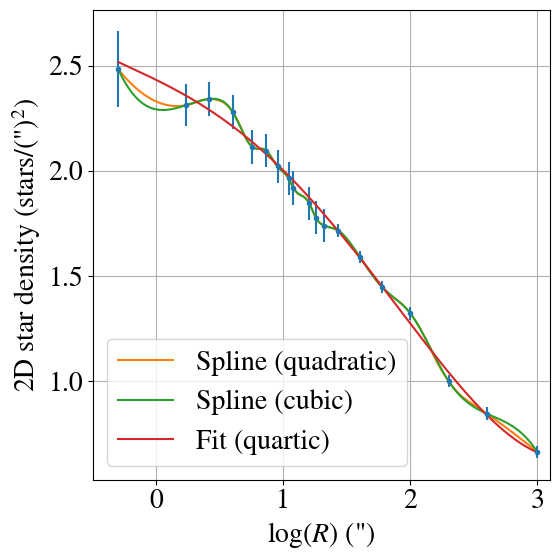

In [130]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

x=np.linspace(-0.3,3,1000)

#ax1.plot(log_r,log_star,'.')
ax1.errorbar(log_r,log_star, linestyle='None',marker='.', markersize=6, yerr=log_star_err)
ax1.plot(x,f1(x),label='Spline (quadratic)')
ax1.plot(x,f2(x),label='Spline (cubic)')
ax1.plot(x,fit(x,f3[0],f3[1],f3[2],f3[3],f3[4]),label='Fit (quartic)')


ax1.set_xlim(-0.5,3.1)
#ax1.set_ylim(0,10000)

ax1.legend(loc=3)
ax1.grid()

ax1.set_xlabel('log($R$) (")')
ax1.set_ylabel('2D star density (stars/(")$^{2}$)')

plt.tight_layout()

# OLD stars

In [10]:
f1_old = interp1d(log_r, log_star_old, fill_value='extrapolate', kind='quadratic')
f2_old = interp1d(log_r, log_star_old, fill_value='extrapolate', kind='quadratic')
f3_old = np.polyfit(log_r, log_star_old, w=1/log_star_err, deg=4)

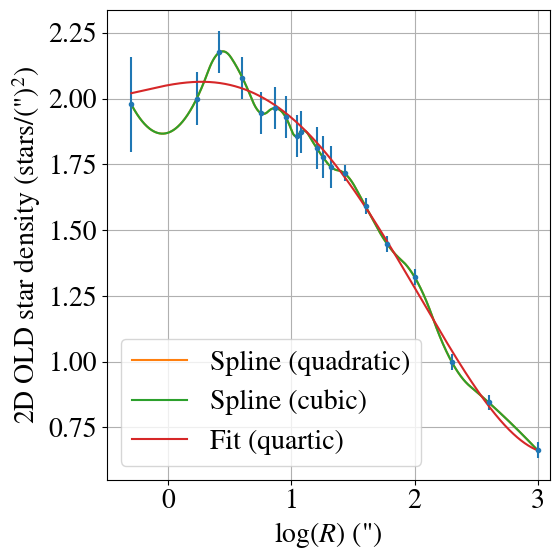

In [15]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

x=np.linspace(-0.3,3,1000)

#ax1.plot(log_r,log_star,'.')
ax1.errorbar(log_r,log_star_old, linestyle='None',marker='.', markersize=6, yerr=log_star_err)
ax1.plot(x,f1_old(x),label='Spline (quadratic)')
ax1.plot(x,f2_old(x),label='Spline (cubic)')
ax1.plot(x,fit(x,f3_old[0],f3_old[1],f3_old[2],f3_old[3],f3_old[4]),label='Fit (quartic)')


ax1.set_xlim(-0.5,3.1)
#ax1.set_ylim(0,10000)

ax1.legend(loc=3)
ax1.grid()

ax1.set_xlabel('log($R$) (")')
ax1.set_ylabel('2D OLD star density (stars/(")$^{2}$)')

plt.tight_layout()

<font size="5">
The following equation is what I used for estimating 3D star density.<br>
$\nu(r) = \frac{1}{\pi} \int^{\infty}_{r} \frac{d\epsilon}{dR} \frac{dR}{\sqrt{R^{2}-r^{2}}} = \frac{1}{\pi} \int^{\infty}_{r} \epsilon (R) \frac{dlog\epsilon}{dlogR} \frac{dlogR}{\sqrt{10^{2logR}-10^{2logr}}}$<br>
And I replaced $\infty$ with log($R$)=3 because I can't extrapolate well after the upper limit of log($R$) observation.
</font>

# ALL stars

In [25]:
def fit_f(x):
    a=f3[0]
    b=f3[1]
    c=f3[2]
    d=f3[3]
    e=f3[4]
    return a*x**4+b*x**3+c*x**2+d*x+e

In [26]:
# Numerical integration

N=100000
def nu(r,f):
    
    R_array=np.linspace(r,3,N)
    
    integral=0
    for i in range(N-1):
        R0=R_array[i]
        R1=R_array[i+1]
       
        dR=(R1-R0)
        dstar_dR=(f(R1)-f(R0))/dR
        t=-f(R1)*dstar_dR*dR/np.sqrt(10**(2*R1)-10**(2*r))
        integral+=t
    
    if i/N>0.5:
        print('half done')
    
    return integral/np.pi

In [27]:
n_r=200
r_array=np.linspace(-0.3,2.9,n_r)

nu1=nu(r_array,f1)
nu2=nu(r_array,f2)
nu3=nu(r_array,fit_f)

half done
half done
half done


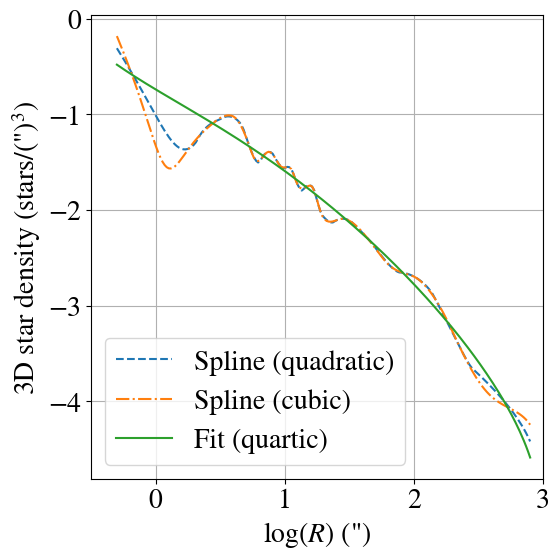

In [28]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

x=np.linspace(-0.3,3,1000)

ax1.plot(r_array,np.log10(nu1),'--',lw=1.5,label='Spline (quadratic)')
ax1.plot(r_array,np.log10(nu2),'-.',lw=1.5,label='Spline (cubic)')
ax1.plot(r_array,np.log10(nu3),'-',lw=1.5,label='Fit (quartic)')

ax1.set_xlim(-0.5,3)
#ax1.set_ylim(0,10000)

ax1.legend(loc=3)
ax1.grid()

ax1.set_xlabel('log($R$) (")')
ax1.set_ylabel('3D star density (stars/(")$^{3}$)')

plt.tight_layout()

# OLD stars

In [19]:
def fit_f_old(x):
    a=f3_old[0]
    b=f3_old[1]
    c=f3_old[2]
    d=f3_old[3]
    e=f3_old[4]
    return a*x**4+b*x**3+c*x**2+d*x+e

In [31]:
# Numerical integration

N=1000000
def nu(r,f):
    
    R_array=np.linspace(r,3,N)
    
    integral=0
    for i in range(N-1):
        R0=R_array[i]
        R1=R_array[i+1]
       
        dR=(R1-R0)
        dstar_dR=(f(R1)-f(R0))/dR
        t=-f(R1)*dstar_dR*dR/np.sqrt(10**(2*R1)-10**(2*r))
        integral+=t
    
    if i/N>0.5:
        print('half done')
    
    return integral/np.pi

In [32]:
n_r=200
r_array=np.linspace(-0.3,2.9,n_r)

nu1_old=nu(r_array,f1_old)
nu2_old=nu(r_array,f2_old)
nu3_old=nu(r_array,fit_f_old)

half done
half done
half done


C:\Users\JOOHYU~1\AppData\Local\Temp/ipykernel_23536/2246571624.py:6: RuntimeWarning: invalid value encountered in log10
  ax1.plot(r_array,np.log10(nu1_old),'--',lw=1.5,label='Spline (quadratic)')
C:\Users\JOOHYU~1\AppData\Local\Temp/ipykernel_23536/2246571624.py:7: RuntimeWarning: invalid value encountered in log10
  ax1.plot(r_array,np.log10(nu2_old),'-.',lw=1.5,label='Spline (cubic)')
C:\Users\JOOHYU~1\AppData\Local\Temp/ipykernel_23536/2246571624.py:8: RuntimeWarning: invalid value encountered in log10
  ax1.plot(r_array,np.log10(nu3_old),'-',lw=1.5,label='Fit (quartic)')


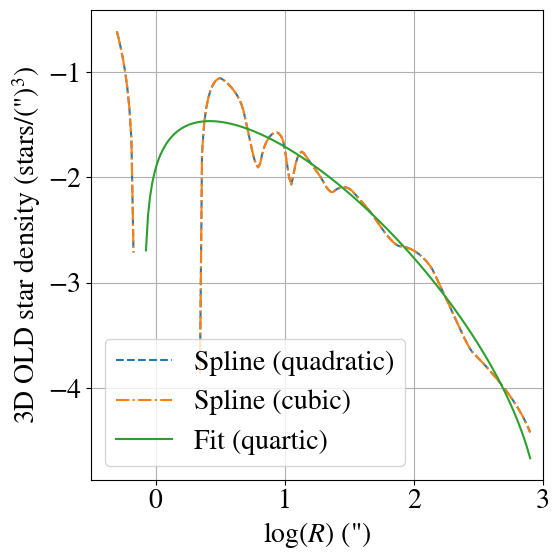

In [33]:
fig=plt.figure(figsize=(6,6),dpi=100)
ax1=fig.add_subplot(111)

x=np.linspace(-0.3,3,1000)

ax1.plot(r_array,np.log10(nu1_old),'--',lw=1.5,label='Spline (quadratic)')
ax1.plot(r_array,np.log10(nu2_old),'-.',lw=1.5,label='Spline (cubic)')
ax1.plot(r_array,np.log10(nu3_old),'-',lw=1.5,label='Fit (quartic)')

ax1.set_xlim(-0.5,3)
#ax1.set_ylim(0,10000)

ax1.legend(loc=3)
ax1.grid()

ax1.set_xlabel('log($R$) (")')
ax1.set_ylabel('3D OLD star density (stars/(")$^{3}$)')

plt.tight_layout()

<font size="5">
When 2D density profile increases, I get negative 3D density, which does not make sense.
</font>

<font size="5">
Because the quartic fit doesn't match the data points within errorbars and the quadratic spline line follows the data well, I will use the quadratic line.
</font>

In [35]:
t=np.c_[r_array,nu1,nu1_old]
np.savetxt('./hw2-Joohyun_Lee.txt',t, header='R(") nu(R)(star/"^3)')
#t